# about data 
Context
* This data set contains two class of images Cats and Dogs. This can be best utilized in a binary classification problem set in computer vision.

# import libaries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow import keras as k
import tensorflow as tf
import plotly.express as px
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

# Show random photos

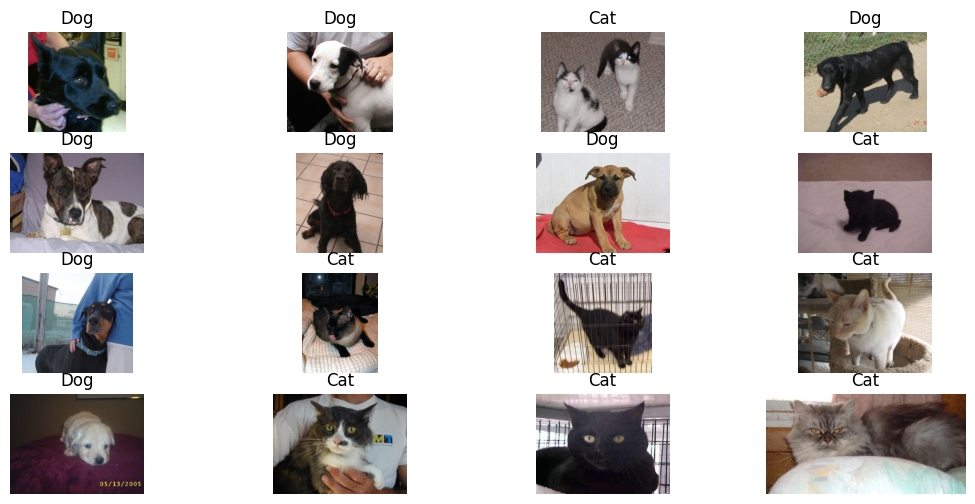

In [2]:
fig=plt.figure(figsize=(13, 6))
# Define row and cols in the figure
rows, cols = 4, 4
nm=list(plt.cm.datad.keys())
arr=np.random.randint(0,10000,(rows*cols,))
c=np.random.choice(['Cat','Dog'],(rows*cols,))
# Display first four images
i=0
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.title(c[i])
  plt.imshow(plt.imread(f'./PetImages/{c[i]}/{arr[i]}.jpg'))
  i+=1 
  plt.axis('off')

plt.show()

# Visualize Data


In [25]:
class_names = ['Cat', 'Dog'] 

n_dogs = len(os.listdir('./PetImages/Dog'))
n_cats = len(os.listdir('./PetImages/Cat'))
n_images = [n_cats, n_dogs]

print(f'Number of images in each class: {n_images}')

#fig = px.pie(names=class_names, values=n_images)
px.pie(names=class_names, values=n_images)
# manage size of the pie chart
#fig.update_layout( width=500, height=500, margin=dict(l=50, r=50, b=100, t=100, pad=4))

* _La cantidad de imagenes de perros y gatos es similar, por lo que no hay un desbalanceo de clases._

# Read images 

* _Se estandarizan las imagenes a un tamaño de 60x60 y se convierten a escala de grises_
* _Se crea un arreglo con las imagenes que se usará para el entrenamiento del modelo_
* _Se organizan las imágenes de manera aleatoria para evitar que el modelo aprenda un patrón_


24946
0
0
0
0
1
1
1
1
1
1


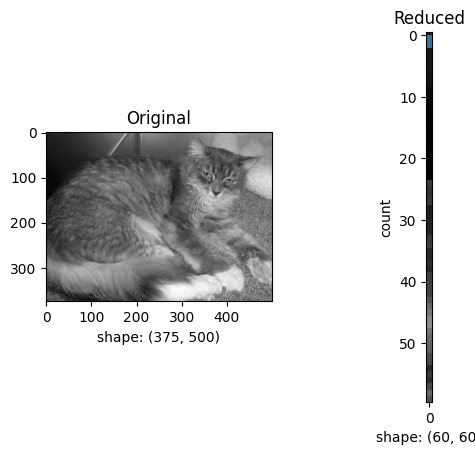

In [4]:

DIRECTORY = './PetImages/'
CATAGORY = ['Cat', 'Dog']
IMG_SIZE = 60
arr = cv2.imread(os.path.join(DIRECTORY,CATAGORY[0],'11590.jpg'), cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(arr, cmap='gray')
plt.title('Original')
plt.xlabel('shape: {}'.format(arr.shape))
plt.subplot(1,2,2)

arr = cv2.resize(arr, (IMG_SIZE,IMG_SIZE))
plt.imshow(arr, cmap='gray')
plt.title('Reduced')
plt.xlabel('shape: {}'.format(arr.shape))
training_data=[]
class_list =[]

# there are some broken imgs(corrupted)
# we will over look them as we encounter them through the try except block
def create_training_data():
    for category in CATAGORY:
        path = os.path.join(DIRECTORY,category)
        class_num = CATAGORY.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([img_array, class_num])
                class_list.append(class_num)
            except Exception as e:
                pass
            
create_training_data()
print(len(training_data))
sns.countplot(pd.Series(class_list).value_counts())
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)

    # (number of images, height, width, num of channels)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

# normalising the data


# Split the data 

In [5]:
X_train, X_test ,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=88)

In [17]:
print( 'Cantidad de datos de entrenamiento en el eje x: '  , len(X_train) , ' = ', len(X_train)/len(X) , '%')
print( 'Cantidad de datos de entrenamiento en el eje y: '  , len(y_train) , ' = ', len(y_train)/len(y) , '%')
print( 'Cantidad de datos de prueba en el eje x: '  , len(X_test) , ' = ', len(X_test)/len(X) , '%')
print( 'Cantidad de datos de prueba en el eje y: '  , len(y_test) , ' = ', len(y_test)/len(y) , '%')

Cantidad de datos de entrenamiento en el eje x:  19956  =  0.7999679307303776 %
Cantidad de datos de entrenamiento en el eje y:  19956  =  0.7999679307303776 %
Cantidad de datos de prueba en el eje x:  4990  =  0.2000320692696224 %
Cantidad de datos de prueba en el eje y:  4990  =  0.2000320692696224 %


* _Se hace la distribución de los datos para el entrenamiento y la validación del modelo_
    * _Se asigna un 80% de los datos para el entrenamiento_
    * _Se asigna un 20% de los datos para la validación_

# Model

In [6]:
model=Sequential([k.layers.BatchNormalization(),k.layers.Conv2D(18,(3,3),activation='relu')])
model.add(k.layers.BatchNormalization())
model.add(Dropout(0.25))

model.add(k.layers.Conv2D(32,(3,3),activation='relu'))
model.add(k.layers.BatchNormalization())

model.add(k.layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(k.layers.Conv2D(64,(3,3),activation='relu'))
model.add(k.layers.BatchNormalization())

model.add(k.layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(k.layers.Conv2D(128,(3,3),activation='relu'))

model.add(k.layers.BatchNormalization())
model.add(k.layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(k.layers.Conv2D(256,(3,3),activation='relu'))
model.add(k.layers.BatchNormalization())
model.add(k.layers.MaxPooling2D())
model.add(Dropout(0.25))

model.add(k.layers.Flatten())
model.add(k.layers.Dense(256,activation='elu',kernel_initializer='he_normal', kernel_regularizer=k.regularizers.L2()))
model.add(k.layers.BatchNormalization())
model.add(Dropout(0.25))

model.add(k.layers.Dense(512,activation='elu',kernel_initializer='he_normal',kernel_regularizer=k.regularizers.L2()))
model.add(k.layers.BatchNormalization())
model.add(Dropout(0.25))

model.add(k.layers.Dense(1,activation='sigmoid'))

* _El modelo utiliza normalización por lotes para normalizar las salidas y mejorar la estabilidad del entrenamiento._
* _Se utiliza una capa de convolución con 18 filtros de 3x3 y una función de activación relu_

In [19]:

model.compile(loss=k.losses.BinaryCrossentropy(from_logits=True),optimizer='nadam',metrics=['accuracy', 'Recall', 'Precision'])

* _Debido a que la cantidad está balanceada en cuanto a la cantidad de imágenes de perros y gatos, accuracy es una buena métrica para evaluar el modelo_
    * _Accuracy se centra en la cantidad total de predicciones correctas, por lo que es una buena métrica para evaluar el modelo_
* _Se considera utilizar la métrica de Recall, debido a que nos interesa también la capacidad del modelo de la clasificar correctamente las imágenes en su respectiva clase_
    * _Recall se centra en la cantidad de veces que el modelo logró identificar correctamente la clase de la imagen_
* _Se utiliza también la métrica de precision, pues nos interesa tener en cuenta la presencia de falsos positivos en el modelo_
    * _Precision se centra en la cantidad de veces que el modelo predijo correctamente la clase de la imagen en comparación con la cantidad total de positivos, tanto verdaderos como falsos_
* _Se utiliza un optimizador Adam con una tasa de aprendizaje de 0.001_


In [20]:
hist=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=.1,callbacks=k.callbacks.EarlyStopping(patience=10,restore_best_weights=True))

Epoch 1/50


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5703: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?



562/562 [==============================] - 176s 272ms/step - loss: 0.3275 - accuracy: 0.8841 - recall: 0.8867 - precision: 0.8831 - val_loss: 0.3562 - val_accuracy: 0.8642 - val_recall: 0.7878 - val_precision: 0.9246
Epoch 2/50
562/562 [==============================] - 128s 228ms/step - loss: 0.3311 - accuracy: 0.8816 - recall: 0.8865 - precision: 0.8788 - val_loss: 0.3337 - val_accuracy: 0.8783 - val_recall: 0.8724 - val_precision: 0.8787
Epoch 3/50
562/562 [==============================] - 121s 215ms/step - loss: 0.3202 - accuracy: 0.8849 - recall: 0.8850 - precision: 0.8857 - val_loss: 0.3388 - val_accuracy: 0.8778 - val_recall: 0.8357 - val_precision: 0.9080
Epoch 4/50
562/562 [==============================] - 133s 236ms/step - loss: 0.3133 - accuracy: 0.8884 - recall: 0.8908 - precision: 0.8875 - val_loss: 0.4230 - val_accuracy: 0.8517 - val_recall: 0.7480 - val_precision: 0.9373
Epoch 5/50
562/562 [==============================] - 126s 223ms/step - loss: 0.3085 - accuracy: 0.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 60, 60, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 58, 58, 18)        180       
                                                                 
 batch_normalization_1 (Batc  (None, 58, 58, 18)       72        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 58, 58, 18)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        5216      
                                                                 
 batch_normalization_2 (Batc  (None, 56, 56, 32)       1

# Test

In [22]:
model.evaluate(X_test,y_test)

156/156 [==============================] - 6s 38ms/step - loss: 0.3323 - accuracy: 0.8850 - recall: 0.8597 - precision: 0.9029


[0.33225756883621216, 0.88496994972229, 0.8597486615180969, 0.9029374122619629]

# Visualize training process

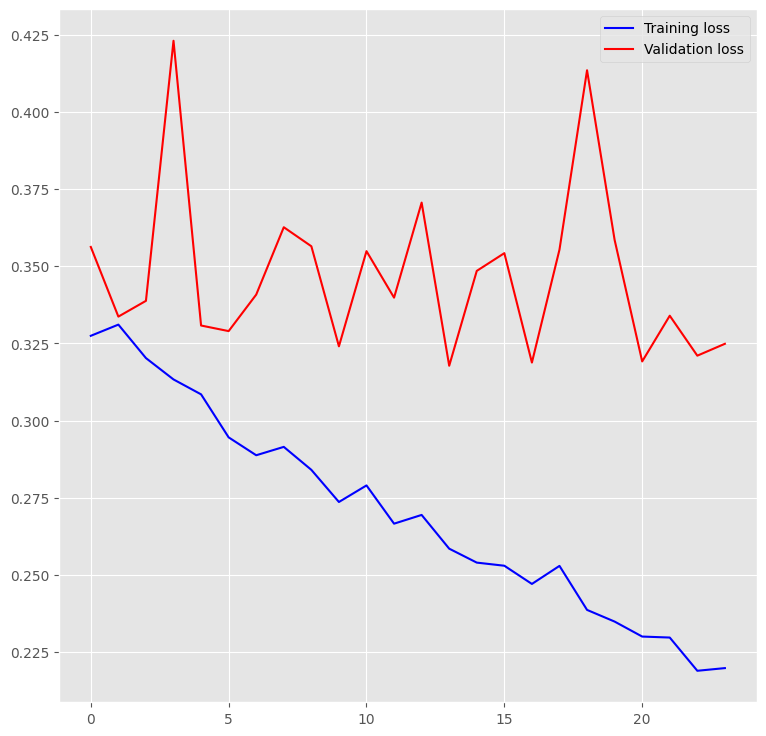

<Figure size 640x480 with 0 Axes>

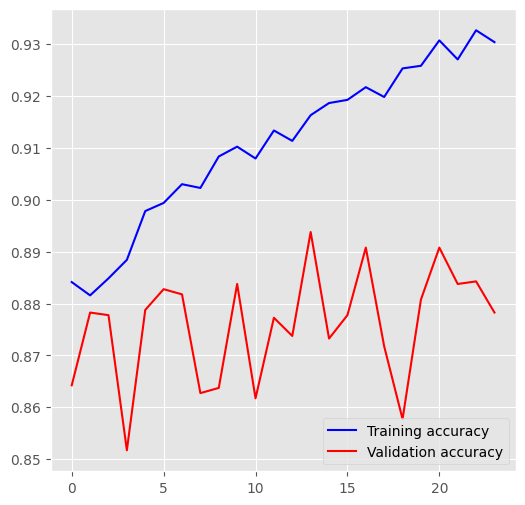

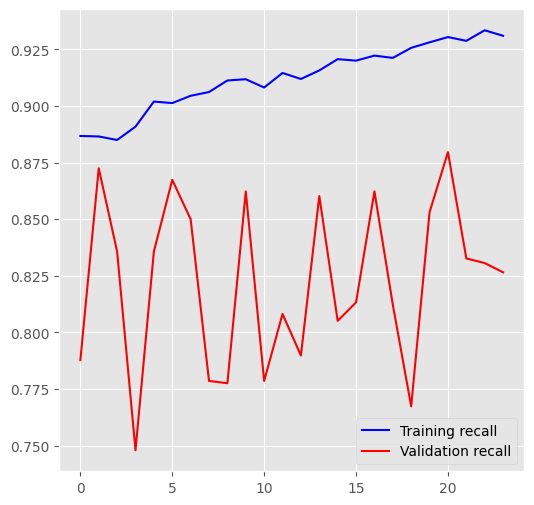

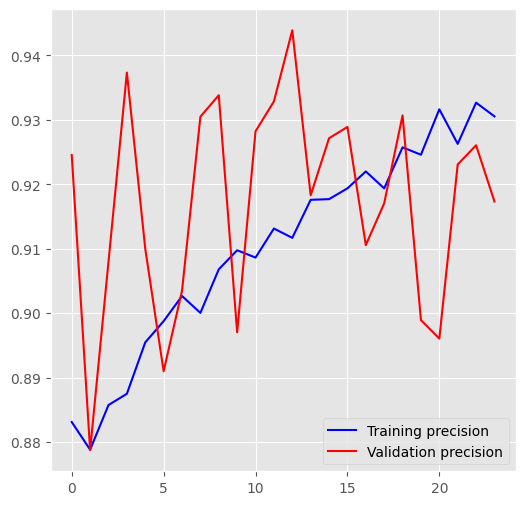

In [23]:
plt.figure(figsize=(9,9))
plt.style.use("ggplot")
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()


# accuracy
plt.figure()

plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

# recall

plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['recall'], color='b', label="Training recall")
plt.plot(hist.history['val_recall'], color='r',label="Validation recall")
plt.legend(loc = "lower right")
plt.show()

# precision

plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(hist.history['precision'], color='b', label="Training precision")
plt.plot(hist.history['val_precision'], color='r',label="Validation precision")
plt.legend(loc = "lower right")
plt.show()


* ### Viendo las métricas de rendimiento del modelo, en especial la precisión y la pérdida, podemos decir lo siguiente:
    * ### La precisión, tanto en el entrenamiento como en la validación, se estabiliza en un mayor al 91%, lo que nos indica que el modelo es capaz de clasificar correctamente las imágenes en su respectiva clase y una baja presencia de falsos positivos.
    * ### Ya que establecemos la baja presencia de falsos positivos, entonces la pérdida del modelo, que es mayor a 0.3, se debe a la presencia de falsos negativos.
    * ### Esto se ve apoyado por el valor relativamente inestable y bajo del recall (en comparación a las demás métricas), que nos indica que el modelo tiene una tendencia a falsos negativos.
    * ### Ya que el accuracy del modelo es mayor al 87%, podemos decir que el modelo es aceptablemente exacto en la clasificación de las imágenes.
    * ### Por lo tanto, el modelo tiene un rendimiento aceptable, pero las diferentes métricas demuestran que el modelo erra en la claificación negativa de las imágenes. Es decir que, mientras la exactitud general del modelo es buena y la presencia de falsos positivos es minimizada, la presencia de falsos negativos es persistente y puede ser mejorada.
